In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/clase_10/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En esta parte vimos dos bibliotecas muy usadas para visualizaciones en python, que son matplotlib y seaborn.

https://matplotlib.org/

https://seaborn.pydata.org/index.html

En este curso vamos a usar herramientas de visualización prinicipalmente para análisis exploratorio de datos.

La idea de esta práctica es ejercitar algunos gráficos de seaborn que vamos a volver a usar en la clase presencial.

Usaremos el dataset con las propiedades inmobiliarias en Melbourne, que ya conocemos de la práctica de Limpieza de Datos.


## Dataset

https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

El dataset que usaremos en esta parte, del 2017, está construido con los datos que se publicaron cada semana en https://www.domain.com.au/ 

Los datos incluyen dirección, tipo de inmueble, barrio, método de venta, habitaciones, precio, agente inmobiliario, fecha de venta y distancia a CBD (Central Business District).

Los campos que incluye son:

**Rooms**: cantidad de habitaciones

**Price**: precio en dolares

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**SellerG**: agente inmobiliario

**Date**: fecha de venta

**Distance**: distancia a CBD

**Regionname**: región (West, North West, North, North east …etc)

**Propertycount**: cantidad de inmuebles que existen en ese suburbio.

**Bedroom2** : Scraped # habitaciones (de distintas fuentes)

**Bathroom**: cantidad de baños

**Car**: cantidad de carspots

**Landsize**: superficie

**BuildingArea**: tamaño del edificio

**CouncilArea**: municipio



### Ejercicio 1: Leemos los datos

Importar el archivo melb_data.csv e inspeccionar los primeros casos y los tipos de datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = '../Data/melb_data.csv'
data = pd.read_csv(path, delimiter = ",")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Ejercicio 2: boxplot

Vamos usar un boxplot para ver la distribución de valores de la columna Rooms para cinco valores de Suburb (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Usaremos 

* x: Suburb

* y: Rooms

* palette: ["lightblue", "pink", "yellow", "green", "orange"]

* data: el dataset filtrado por los valores de Suburb de interés


<AxesSubplot:xlabel='Suburb', ylabel='Rooms'>

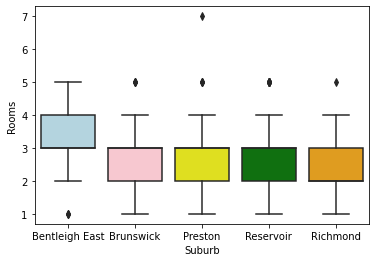

In [19]:
barrios_de_interes = ["Reservoir", "Richmond", "Bentleigh East", "Preston", "Brunswick"]

mask_interes = data.Suburb.apply(lambda x: x in barrios_de_interes)

data_interes = data.loc[mask_interes,:]

sns.boxplot("Suburb", "Rooms", data=data_interes, palette = ["lightblue","pink","yellow","green","orange"])

### Ejercicio 3: violinplot

Vamos usar un violinplot para ver la distribución de valores de la columna Car para los cinco valores de Suburb del ejercicio anterior (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Usaremos 

* x: Suburb

* y: Rooms

* palette: ["lightblue", "pink", "yellow", "green", "orange"]

* data: el dataset filtrado por los valores de Suburb de interés
     

/Users/csuarezgurruchaga/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suburb', ylabel='Rooms'>

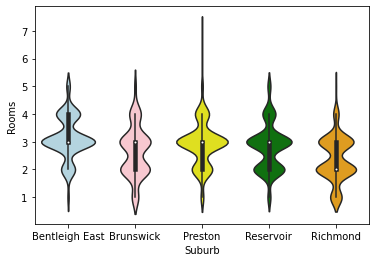

In [24]:
sns.violinplot("Suburb", "Rooms", data=data_interes, palette = ["lightblue","pink","yellow","green","orange"])

### Ejercicio 4: PairGrid

https://seaborn.pydata.org/generated/seaborn.PairGrid.html

Veamos ahora si existe alguna correlación entre los valores de las columnas Car, Rooms, Distance, Landsize, Price para los valores de Suburb del ejercicio anterior (Reservoir, Richmond, Bentleigh East, Preston, Brunswick)

Usemos para eso `PairGrid`.

¿Qué conclusiones podemos sacar de estos gráficos?

Paletas: 
https://seaborn.pydata.org/tutorial/color_palettes.html

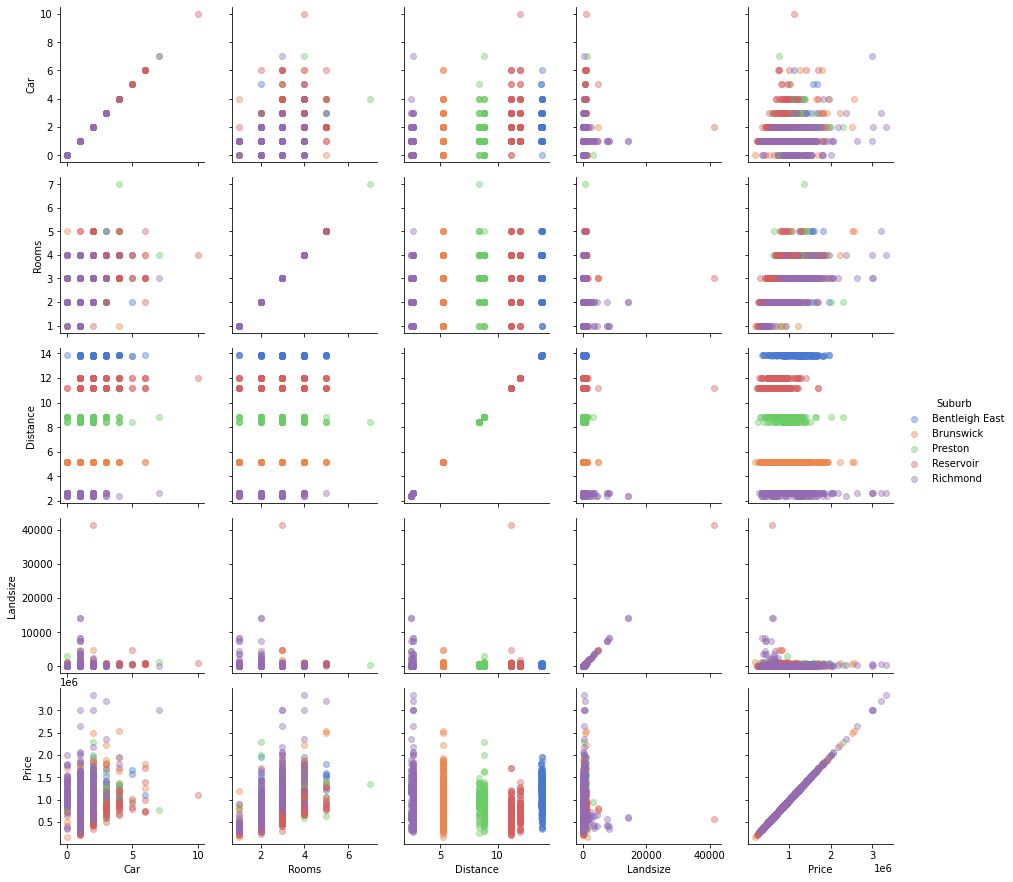

In [43]:
g = sns.PairGrid(data=data_interes,vars = ["Car", "Rooms", "Distance", "Landsize", "Price"], hue = 'Suburb', palette = 'muted')

g.map(plt.scatter, alpha = 0.4)
g.add_legend()

Conclusiones:
Distance, representaba la distancia desde el inmueble al centro. Con este grafico podemos concluir como el precio a medida que nos acercamos al centro va aumentando graph, ya que las propiedades ubicadas en el barrio de Richmond, son las mas caras.

Tambien podemos concluir que no hay una clara relacion entre el precio y landsize.

Tambien podemos concluir que no hay una clara relacion entre landsize y the number of car parkings


### Ejercicio 5: distplot

El campo Type toma valores

h: house, cottage, villa, semi,terrace; 

u: unit, duplex;

t: townhouse

https://seaborn.pydata.org/generated/seaborn.distplot.html

Veamos cómo se ditribuye la variable Price para cada uno de los tipos de inmueble h, u, t.

<AxesSubplot:xlabel='Price', ylabel='Count'>

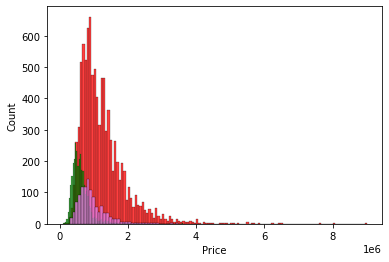

In [80]:
data_h_mask = data["Type"] == "h"
data_h = data.loc[data_h_mask,:]

data_u_mask = data.Type == 'u'
data_u = data.loc[data_u_mask,:]

data_t_mask = data.Type == "t"
data_t = data.loc[data_t_mask,:]

sns.histplot(data = data_h.Price, color = 'red')
sns.histplot(data = data_u.Price, color = 'green')
sns.histplot(data = data_t.Price, color = 'violet')


### Ejercicio 6: joinplot

Veamos a filtrar los imuebles por su valor en el campo Price.

Nos vamos a quedar con los que valen hasta 5 millones (0.5E7) y graficaremos la relación entre los campos Price y Propertycount usando un jointplot.

https://seaborn.pydata.org/generated/seaborn.jointplot.html

/Users/csuarezgurruchaga/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


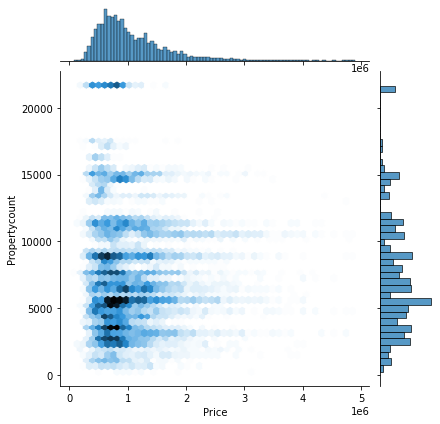

In [88]:
mask_price = data.Price <= 0.5E7
price_masked = data.loc[mask_price,:]



g=sns.jointplot("Price", "Propertycount", data=price_masked, kind = 'hex')

### Adicional

Revisemos algunos de los ejemplos de gráficos que están en este link

https://python-graph-gallery.com/

Miremos los ejemplos de código de 

* boxplot http://python-graph-gallery.com/boxplot/

* scatterplot http://python-graph-gallery.com/scatter-plot/

* violin https://python-graph-gallery.com/violin-plot/

* seaborn https://python-graph-gallery.com/seaborn/

* matplotlib https://python-graph-gallery.com/matplotlib/

